In [5]:
path = r'C:/Users/ruw/Desktop'
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{path}\RA\penicilin\Libaries')

In [6]:
import reload_lib as rl
import life_cycle_assessment as lc
import lcia_results as lr
import standards as s
import database_manipulation as dm
import results_figures as rfig
import sensitivity as st
import lca
import sensitvity_countries as stc
import sensitivity_EoL as eol
lib = [rl, lc, lr, dm, s, rfig, lca, st, stc, eol]
rl.reload_lib(lca)
rl.reload_lib(lib)

In [7]:
from lca import LCA
rl.reload_lib(lca)


In [8]:
matching_database = "ev391cutoff"
lcia_method='recipe'
bw_project="Penicillin"
database = "penicillin_cut_off_IN"

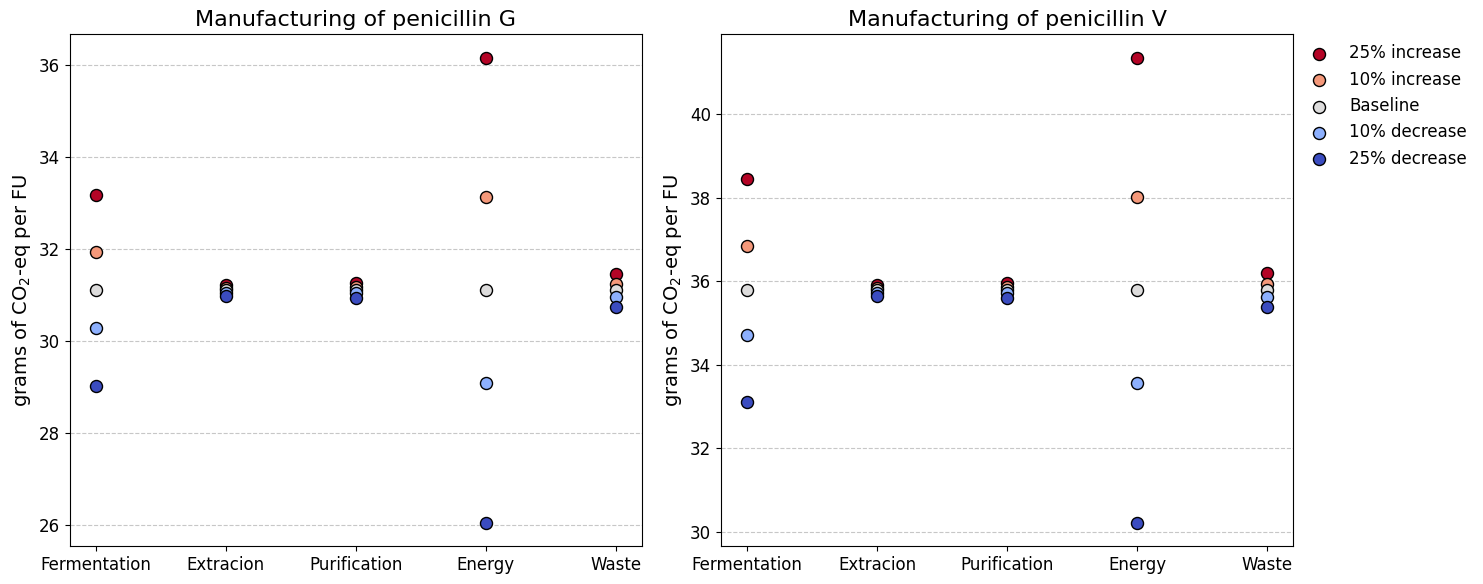

In [31]:
rl.reload_lib(lib)
rl.reload_lib(lca)


# data = rfig.create_results_figures() # Calculating the results and creating the figures
st.perform_sens_uncert_analysis(mc_base=10, mc_power=6, calc=False)
# stc.countries_sens_plot(calc=False)
